In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

life_df = pd.read_csv(r"D:\NLPInsuranceProject\NLPINSURANCE-FINTECHPROJ\Policy Recommendation Dataset\balanced_life_insurance.csv")
health_df = pd.read_csv(r"D:\NLPInsuranceProject\NLPINSURANCE-FINTECHPROJ\Policy Recommendation Dataset\balanced_health_insurance.csv")
motor_df = pd.read_csv(r"D:\NLPInsuranceProject\NLPINSURANCE-FINTECHPROJ\Policy Recommendation Dataset\balanced_motor_insurance.csv")


In [18]:
# Check for missing values 
print(life_df.isnull().sum())
print(health_df.isnull().sum())
print(motor_df.isnull().sum())


Policy_Number      0
Customer_Name      0
Age                0
Policy_Type        0
Company            0
Company_Product    0
Sum_Assured        0
Term               0
Nominee            0
Smoker             0
dtype: int64
Policy_Number             0
Customer_Name             0
Age                       0
Policy_Type               0
Company                   0
Company_Product           0
Sum_Insured               0
Medical_History         462
Last_Hospitalization    494
Preventive_Checkup        0
dtype: int64
Policy_Number         0
Vehicle_Number        0
Policy_Type           0
Company               0
Company_Product       0
Vehicle_Type          0
Manufacture_Year      0
IDV_Percentage        0
Accident_History    356
Current_Value         0
Buyback_Eligible      0
dtype: int64


In [19]:
life_df['Company_Product'].value_counts()

Company_Product
LIC Forever Secure                 21
ICICI Pru Life Permanent Shield    21
LIC Permanent Shield               21
Max Life Forever Secure            21
SBI Life Lifetime Cover            20
Max Life Permanent Shield          20
HDFC Life Permanent Shield         20
HDFC Life Secure Future            19
SBI Life Life Protect              19
SBI Life Forever Secure            18
ICICI Pru Life Lifetime Cover      18
LIC Term Elite                     17
HDFC Life Wealth Builder           17
HDFC Life Forever Secure           17
Max Life Secure Future             17
Max Life Money Back Plus           17
Max Life Savings Plan              17
LIC Secure Future                  16
ICICI Pru Life Term Elite          16
SBI Life Money Back Plus           16
HDFC Life Lifetime Cover           16
HDFC Life Savings Plan             15
ICICI Pru Life Forever Secure      15
SBI Life Savings Plan              15
HDFC Life Term Elite               15
ICICI Pru Life Wealth Builder     

In [20]:
print(life_df.describe())
print(health_df.describe())
print(motor_df.describe())


              Age   Sum_Assured        Term
count  800.000000  8.000000e+02  800.000000
mean    44.431250  2.126875e+06   20.112500
std     14.717031  1.718038e+06    7.105488
min     20.000000  5.000000e+05   10.000000
25%     32.000000  1.000000e+06   15.000000
50%     44.000000  2.000000e+06   20.000000
75%     57.000000  2.000000e+06   25.000000
max     70.000000  5.000000e+06   30.000000
              Age     Sum_Insured
count  700.000000      700.000000
mean    49.430000   649928.571429
std     17.444027   260645.990792
min     18.000000   300000.000000
25%     34.000000   500000.000000
50%     50.000000   750000.000000
75%     64.000000  1000000.000000
max     80.000000  1000000.000000
       Manufacture_Year  IDV_Percentage  Current_Value
count        500.000000      500.000000   5.000000e+02
mean        2017.614000       72.614000   6.032249e+05
std            4.738133        4.738133   3.423622e+05
min         2010.000000       65.000000   1.250000e+05
25%         2014.000000

## Data Visualization

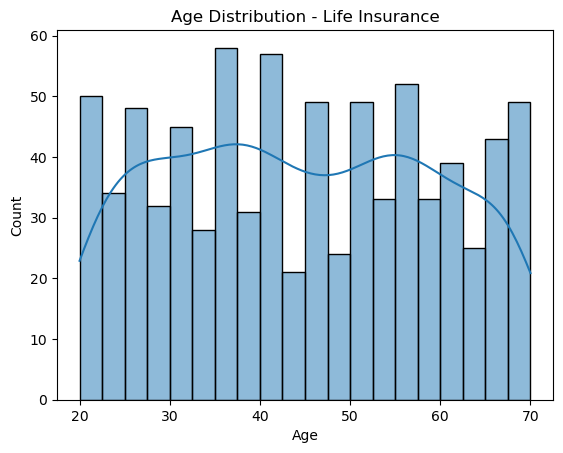

In [21]:
# Age distribution
sns.histplot(life_df["Age"], kde=True, bins=20)
plt.title("Age Distribution - Life Insurance")
plt.show()


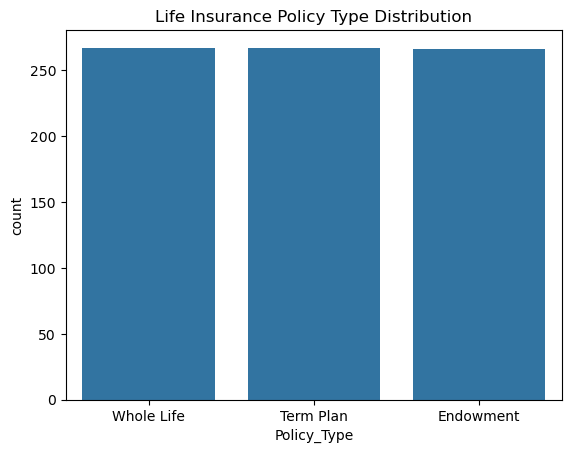

In [22]:
sns.countplot(x="Policy_Type", data=life_df)
plt.title("Life Insurance Policy Type Distribution")
plt.show()


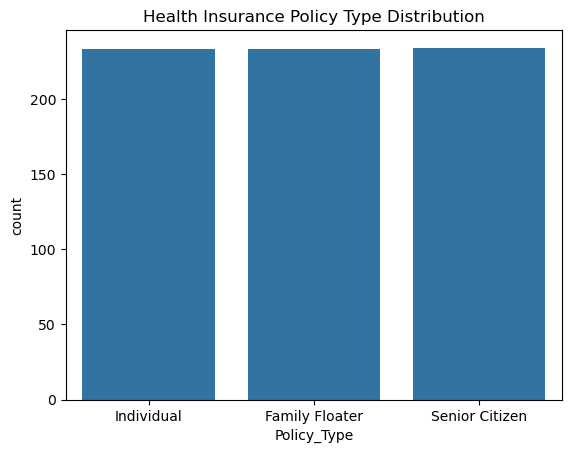

In [23]:
sns.countplot(x="Policy_Type", data=health_df)
plt.title("Health Insurance Policy Type Distribution")
plt.show()

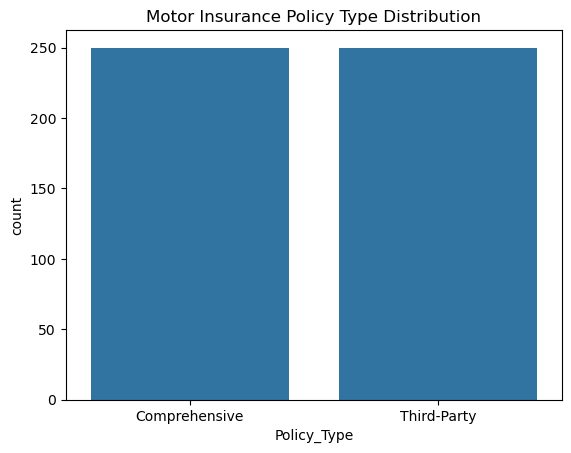

In [24]:
sns.countplot(x="Policy_Type", data=motor_df)
plt.title("Motor Insurance Policy Type Distribution")
plt.show()

## Feature Engineering

## Life Insurance 

In [25]:
life_df

,Policy_Number,Customer_Name,Age,Policy_Type,Company,Company_Product,Sum_Assured,Term,Nominee,Smoker
0,LIFE-809958,Hemal Mani,27,Whole Life,SBI Life,SBI Life Permanent Shield,500000,25,Laksh Oommen,False
1,LIFE-104463,Saksham Pandey,36,Whole Life,Max Life,Max Life Forever Secure,1000000,10,Nandini Chatterjee,False
2,LIFE-632658,Udarsh Soman,35,Whole Life,HDFC Life,HDFC Life Lifetime Cover,1000000,15,Hemang Chaudry,True
3,LIFE-821857,Yashvi Ramesh,39,Term Plan,LIC,LIC Life Protect,5000000,20,Vihaan Andra,False
4,LIFE-663866,Veda Dixit,50,Term Plan,ICICI Pru Life,ICICI Pru Life Term Elite,500000,10,Sanya Bhagat,True
...,...,...,...,...,...,...,...,...,...,...
795,LIFE-348366,Aarnav Kashyap,67,Whole Life,ICICI Pru Life,ICICI Pru Life Lifetime Cover,1000000,20,Alka Sanghvi,False
796,LIFE-552394,Aishani Bhardwaj,52,Whole Life,ICICI Pru Life,ICICI Pru Life Permanent Shield,5000000,10,Rishi Ben,False
797,LIFE-304390,Yutika Uppal,27,Endowment,ICICI Pru Life,ICICI Pru Life Money Back Plus,5000000,20,Daniel Upadhyay,False
798,LIFE-508226,Vanya Mand,60,Term Plan,LIC,LIC Term Elite,5000000,20,Yadavi Magar,False


In [26]:
life_df = life_df.drop(['Policy_Number','Customer_Name','Nominee'],axis=1)
life_df.head()

,Age,Policy_Type,Company,Company_Product,Sum_Assured,Term,Smoker
0,27,Whole Life,SBI Life,SBI Life Permanent Shield,500000,25,False
1,36,Whole Life,Max Life,Max Life Forever Secure,1000000,10,False
2,35,Whole Life,HDFC Life,HDFC Life Lifetime Cover,1000000,15,True
3,39,Term Plan,LIC,LIC Life Protect,5000000,20,False
4,50,Term Plan,ICICI Pru Life,ICICI Pru Life Term Elite,500000,10,True


### Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = life_df.drop(['Company_Product'],axis=1)
y = life_df['Company_Product']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((560, 6), (240, 6), (560,), (240,))

In [28]:
X_train

,Age,Policy_Type,Company,Sum_Assured,Term,Smoker
404,25,Endowment,SBI Life,1000000,25,False
522,51,Term Plan,HDFC Life,5000000,15,False
749,64,Term Plan,Max Life,2000000,10,False
426,47,Whole Life,Max Life,5000000,20,False
41,41,Term Plan,Max Life,500000,20,False
...,...,...,...,...,...,...
71,46,Whole Life,Max Life,2000000,15,False
106,20,Endowment,Max Life,2000000,10,False
270,57,Term Plan,SBI Life,2000000,15,False
435,47,Term Plan,ICICI Pru Life,500000,20,False


## Model Development 

## 1. Word2Vec Cosine Similarity based model 

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec


# Select relevant features (excluding "Company" and "Company_Product" from similarity computation)
life_df = life_df[["Age", "Policy_Type", "Sum_Assured", "Term", "Smoker", "Company_Product"]]

# Normalize numerical features
scaler = MinMaxScaler()
life_df[["Age", "Sum_Assured", "Term"]] = scaler.fit_transform(life_df[["Age", "Sum_Assured", "Term"]])

# Convert categorical features ("Policy_Type", "Smoker") to embeddings using Word2Vec
categorical_cols = ["Policy_Type", "Smoker"]
sentences = life_df[categorical_cols].astype(str).values.tolist()

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=50, window=10, min_count=1, workers=-1)

def get_policy_embedding(attributes):
    """Convert user attributes into an embedding (excluding Company and Company_Product)"""
    age, policy_type, sum_assured, term, smoker = attributes  # Excluding Company & Company_Product
    
    # Get categorical embeddings
    policy_embedding = (
        w2v_model.wv[policy_type] + 
        w2v_model.wv[str(smoker)]  
    )
    
    # Get scaled numerical embeddings
    numerical_embedding = np.array([age, sum_assured, term])
    
    # Combine categorical and numerical embeddings
    final_embedding = np.concatenate((policy_embedding, numerical_embedding))
    
    return final_embedding

# Convert all dataset policies into embeddings (excluding Company & Company_Product)
embedding_matrix = np.array([
    get_policy_embedding(row[:-1]) for row in life_df.values  # Exclude last column (Company_Product)
])

def recommend_company_product(age, policy_type, sum_assured, term, smoker, top_n=5):
    """Recommend Company Product based on user-selected attributes (excluding Company)"""
    
    # Normalize user input
    age, sum_assured, term = scaler.transform([[age, sum_assured, term]])[0]
    
    # Get user's embedding (excluding Company & Company_Product)
    user_embedding = get_policy_embedding([age, policy_type, sum_assured, term, smoker])
    
    # Compute similarity
    similarity_scores = cosine_similarity([user_embedding], embedding_matrix)[0]
    
    # Get top N similar policies
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    
    return life_df.iloc[top_indices][["Company_Product"]].drop_duplicates().reset_index(drop=True)

# Example Usage:
user_input = {
    "age": 40,
    "policy_type": "Term Plan",
    "sum_assured": 1000000,
    "term": 20,
    "smoker": False
}

recommendations = recommend_company_product(**user_input, top_n=5)
print("\nRecommended Company Products:")
print(recommendations)



Recommended Company Products:
             Company_Product
0       HDFC Life Term Elite
1      SBI Life Life Protect
2           LIC Life Protect
3        Max Life Term Elite
4  ICICI Pru Life Term Elite


d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
def precision_at_k(recommended_products, actual_product, k=5):
    return int(actual_product in recommended_products[:k]) / k
def recall_at_k(recommended_products, actual_product, all_relevant_products, k=5):
    return int(actual_product in recommended_products[:k]) / len(all_relevant_products)
def mean_reciprocal_rank(recommended_products, actual_product):
    try:
        rank = recommended_products.index(actual_product) + 1  # Rank is 1-based
        return 1 / rank
    except ValueError:
        return 0  # No relevant product found
import numpy as np

def ndcg_at_k(recommended_products, actual_product, k=5):
    relevance = [1 if rec == actual_product else 0 for rec in recommended_products[:k]]
    
    def dcg(scores):
        return sum([rel / np.log2(idx + 2) for idx, rel in enumerate(scores)])
    
    ideal_relevance = sorted(relevance, reverse=True)
    return dcg(relevance) / dcg(ideal_relevance) if dcg(ideal_relevance) > 0 else 0



def evaluate_recommender(model, test_data, top_n=5):
    """Evaluate the recommendation model on test data."""
    precision_scores, recall_scores, mrr_scores, ndcg_scores = [], [], [], []
    
    for _, row in test_data.iterrows():
        actual_product = row["Company_Product"]
        recommended_df = recommend_company_product(
            row["Age"], row["Policy_Type"], row["Sum_Assured"], row["Term"], row["Smoker"], top_n=top_n
        )
        recommended_products = recommended_df["Company_Product"].tolist()
        
        # Compute metrics
        precision_scores.append(precision_at_k(recommended_products, actual_product, k=top_n))
        recall_scores.append(recall_at_k(recommended_products, actual_product, test_data["Company_Product"].unique(), k=top_n))
        mrr_scores.append(mean_reciprocal_rank(recommended_products, actual_product))
        ndcg_scores.append(ndcg_at_k(recommended_products, actual_product, k=top_n))

    # Aggregate results
    return {
        "Precision@K": np.mean(precision_scores),
        "Recall@K": np.mean(recall_scores),
        "MRR": np.mean(mrr_scores),
        "NDCG@K": np.mean(ndcg_scores),
    }

# Example Usage:
test_results = evaluate_recommender(recommend_company_product, life_df.sample(100), top_n=5)
print(test_results)


{'Precision@K': 0.038000000000000006, 'Recall@K': 0.004222222222222222, 'MRR': 0.088, 'NDCG@K': 0.11332989750366913}


## 2. ML models 

In [39]:
# Encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in X.select_dtypes('object'):
    le.fit(X_train[i])

    X_train[i] = le.transform(X_train[i])

    X_test[i] = le.transform(X_test[i])

In [44]:

le.fit(y_train)

y_train = le.transform(y_train)

y_test = le.transform(y_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(  n_estimators=500,
    max_depth=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

y_pred

array([ 7, 10, 27, 40, 30, 51,  2, 35, 31, 51, 21, 33, 20, 36, 33, 38, 34,
       14, 22, 50,  2, 42, 23,  6, 49, 47, 31, 36,  0, 35, 31, 46, 51,  6,
       51, 32, 50, 37, 14,  0, 28, 37, 35, 25, 13, 37, 40, 24, 23, 13, 28,
       13, 53,  6,  6, 29,  0,  0, 40,  2, 17,  9, 20, 46,  4, 15, 46,  7,
       30, 21, 41, 50, 16,  2,  6,  0, 13, 41, 38,  6,  9, 48, 31, 11, 21,
       29, 30,  1, 14, 43, 21,  9, 29, 12,  9, 21, 43, 15, 47, 23, 31, 33,
       14, 44, 17, 36, 23,  9, 34, 23, 23, 41, 27, 32, 14, 39, 13, 50,  3,
       21,  4,  5,  3, 11, 46,  1, 35, 32, 34, 28, 14, 43, 46, 25, 13, 28,
       50, 18,  9, 47, 50, 41, 25, 33, 36, 25, 27, 32, 13, 38, 33,  0, 47,
       50, 25, 36, 29, 25, 25, 52, 33, 33, 19, 12, 33, 22, 15, 29, 28, 36,
       23, 15, 52, 34, 50, 15, 34, 11, 53, 36, 32, 46, 10, 36,  5,  6, 36,
       18,  0, 21, 15,  3, 17, 21, 37, 19,  1, 17, 47, 14, 25, 36,  7, 16,
       27, 13, 13,  0, 33,  5, 49,  1, 14, 50, 39, 19,  3, 45, 23, 17, 49,
       29,  0, 17, 22, 50

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.2833
Precision: 0.3314
Recall: 0.2833
F1 Score: 0.2657
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.75      0.43         4
           1       0.20      0.33      0.25         3
           2       0.50      0.25      0.33         4
           3       0.25      0.14      0.18         7
           4       0.00      0.00      0.00         2
           5       1.00      0.40      0.57         5
           6       0.50      0.50      0.50         4
           7       0.33      0.17      0.22         6
           8       0.00      0.00      0.00         2
           9       0.25      1.00      0.40         2
          10       0.75      0.50      0.60         6
          11       0.25      0.50      0.33         2
          12       0.00      0.00      0.00         3
          13   